In [46]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [47]:
muzea2009 = pd.read_csv("muzea2009.csv")
muzea2022 = pd.read_csv("muzea2022.csv")
ludnosc2009 = pd.read_csv("ludnosc2009.csv")
ludnosc2022= pd.read_csv("ludnosc2009.csv")


In [48]:
pow_map = "powiaty.shp"
pow_m = gpd.read_file(pow_map)

In [49]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [50]:
muzea2009.head()

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Muzea|muzea łącznie z oddziałami
0,3,11212006000,krakowski,1231.0,2009,1206,powiat,12,małopolskie,2.0
1,4,11212210000,nowosądecki,1549.0,2009,1210,powiat,12,małopolskie,6.0
2,5,11212416000,tarnowski,1412.0,2009,1216,powiat,12,małopolskie,4.0
3,6,11216911000,nowotarski,1474.0,2009,1211,powiat,12,małopolskie,5.0
4,212,42214364000,Sopot,17.0,2009,2264,miasto na prawach powiatu,22,pomorskie,2.0


In [51]:
ludnosc2009.head()

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Ludność wg płci oraz w podziale na miasto i wieś (dane półroczne)|rok|ogółem|ogółem
0,3,11212006000,krakowski,1231.0,2009,1206,powiat,12,małopolskie,253344.0
1,4,11212210000,nowosądecki,1549.0,2009,1210,powiat,12,małopolskie,202701.0
2,5,11212416000,tarnowski,1412.0,2009,1216,powiat,12,małopolskie,195908.0
3,6,11216911000,nowotarski,1474.0,2009,1211,powiat,12,małopolskie,185161.0
4,212,42214364000,Sopot,17.0,2009,2264,miasto na prawach powiatu,22,pomorskie,38460.0


In [52]:
list = [muzea2009, muzea2022, ludnosc2009, ludnosc2022]

for i in list:
    i.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)

In [53]:
muzea2009.rename(columns={
    'Muzea|muzea łącznie z oddziałami' : 'muzea2009'
}, inplace=True)
muzea2022.rename(columns={
    'Muzea|muzea łącznie z oddziałami' : 'muzea2022'
}, inplace=True)
ludnosc2009.rename(columns={
    'Ludność wg płci oraz w podziale na miasto i wieś (dane półroczne)|rok|ogółem|ogółem' : 'ludnosc2009'
}, inplace=True)
ludnosc2022.rename(columns={
    'Ludność wg płci oraz w podziale na miasto i wieś (dane półroczne)|rok|ogółem|ogółem' : 'ludnosc2022'
}, inplace=True)

In [54]:
muzea2009.head()

,powiat,Województwo,muzea2009
0,krakowski,małopolskie,2.0
1,nowosądecki,małopolskie,6.0
2,tarnowski,małopolskie,4.0
3,nowotarski,małopolskie,5.0
4,Sopot,pomorskie,2.0


In [55]:
muzea2009['powiat'] = muzea2009['powiat'].str.strip()
ludnosc2009['powiat'] = ludnosc2009['powiat'].str.strip()

In [56]:
muzea2009_merge = muzea2009.merge(ludnosc2009, on='powiat')

In [57]:
muzea2009_merge['muzea2009_średnia_powiaty'] = (muzea2009_merge['muzea2009']/muzea2009_merge['ludnosc2009'])

In [58]:
print(muzea2009_merge[['powiat', 'muzea2009_średnia_powiaty']])

           powiat  muzea2009_średnia_powiaty
0       krakowski                   0.000008
1     nowosądecki                   0.000030
2       tarnowski                   0.000020
3      nowotarski                   0.000027
4           Sopot                   0.000052
..            ...                        ...
394     siedlecki                   0.000012
395    sokołowski                   0.000018
396     węgrowski                   0.000030
397  sochaczewski                   0.000048
398   żyrardowski                   0.000027

[399 rows x 2 columns]


In [59]:
muzea2022.head()

,powiat,Województwo,muzea2022
0,proszowicki,małopolskie,1.0
1,oświęcimski,małopolskie,4.0
2,ostrzeszowski,wielkopolskie,1.0
3,szczecinecki,zachodniopomorskie,2.0
4,goleniowski,zachodniopomorskie,0.0


In [60]:
muzea2022['powiat'] = muzea2022['powiat'].str.strip()
ludnosc2022['powiat'] = ludnosc2022['powiat'].str.strip()

In [61]:
muzea2022_merge = muzea2022.merge(ludnosc2022, on='powiat')

In [62]:
muzea2022_merge['muzea2022_średnia_powiaty'] = (muzea2022_merge['muzea2022']/muzea2022_merge['ludnosc2022'])

In [63]:
print(muzea2022_merge[['powiat', 'muzea2022_średnia_powiaty']])

            powiat  muzea2022_średnia_powiaty
0      proszowicki                   0.000023
1      oświęcimski                   0.000026
2    ostrzeszowski                   0.000018
3     szczecinecki                   0.000026
4      goleniowski                   0.000000
..             ...                        ...
393        łosicki                   0.000031
394     sokołowski                   0.000036
395      węgrowski                   0.000030
396   sochaczewski                   0.000048
397    żyrardowski                   0.000040

[398 rows x 2 columns]


In [64]:
print(muzea2009_merge.isnull().sum())

powiat                       0
Województwo_x                0
muzea2009                    0
Województwo_y                0
ludnosc2009                  0
muzea2009_średnia_powiaty    0
dtype: int64


In [65]:
print(muzea2022_merge.isnull().sum())   

powiat                       0
Województwo_x                0
muzea2022                    0
Województwo_y                0
ludnosc2022                  0
muzea2022_średnia_powiaty    0
dtype: int64


In [66]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [67]:
print(pow_m.columns)
print(muzea2022.columns)


Index(['gml_id', 'JPT_SJR_KO', 'JPT_POWIER', 'JPT_KOD_JE', 'JPT_NAZWA_',
       'JPT_ORGAN_', 'JPT_JOR_ID', 'WERSJA_OD', 'WERSJA_DO', 'WAZNY_OD',
       'WAZNY_DO', 'JPT_KOD__1', 'JPT_NAZWA1', 'JPT_ORGAN1', 'JPT_WAZNA_',
       'ID_BUFORA_', 'ID_BUFORA1', 'ID_TECHNIC', 'IIP_PRZEST', 'IIP_IDENTY',
       'IIP_WERSJA', 'JPT_KJ_IIP', 'JPT_KJ_I_1', 'JPT_KJ_I_2', 'JPT_OPIS',
       'JPT_SPS_KO', 'ID_BUFOR_1', 'JPT_ID', 'JPT_POWI_1', 'JPT_KJ_I_3',
       'JPT_GEOMET', 'JPT_GEOM_1', 'SHAPE_LENG', 'SHAPE_AREA', 'REGON',
       'RODZAJ', 'geometry'],
      dtype='object')
Index(['powiat', 'Województwo', 'muzea2022'], dtype='object')


In [68]:
pow_m['JPT_NAZWA_clean'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False).str.strip()

# Połączenie pow_m z muzea2022
merged_pow_m_muzea2022 = pow_m.merge(muzea2022, left_on='JPT_NAZWA_clean', right_on='powiat', how='left')

# Analogicznie dla muzea2009 
merged_pow_m_muzea2009 = pow_m.merge(muzea2009, left_on='JPT_NAZWA_clean', right_on='powiat', how='left')



In [69]:
merged_pow_m_muzea2009.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry,JPT_NAZWA_clean,powiat,Województwo,muzea2009
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21...",krośnieński,krośnieński,lubuskie,0.0
1,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21...",krośnieński,krośnieński,podkarpackie,4.0
2,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69...",elbląski,elbląski,warmińsko-mazurskie,0.0
3,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61...",ostrołęcki,ostrołęcki,mazowieckie,1.0
4,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61...",sępoleński,sępoleński,kujawsko-pomorskie,0.0


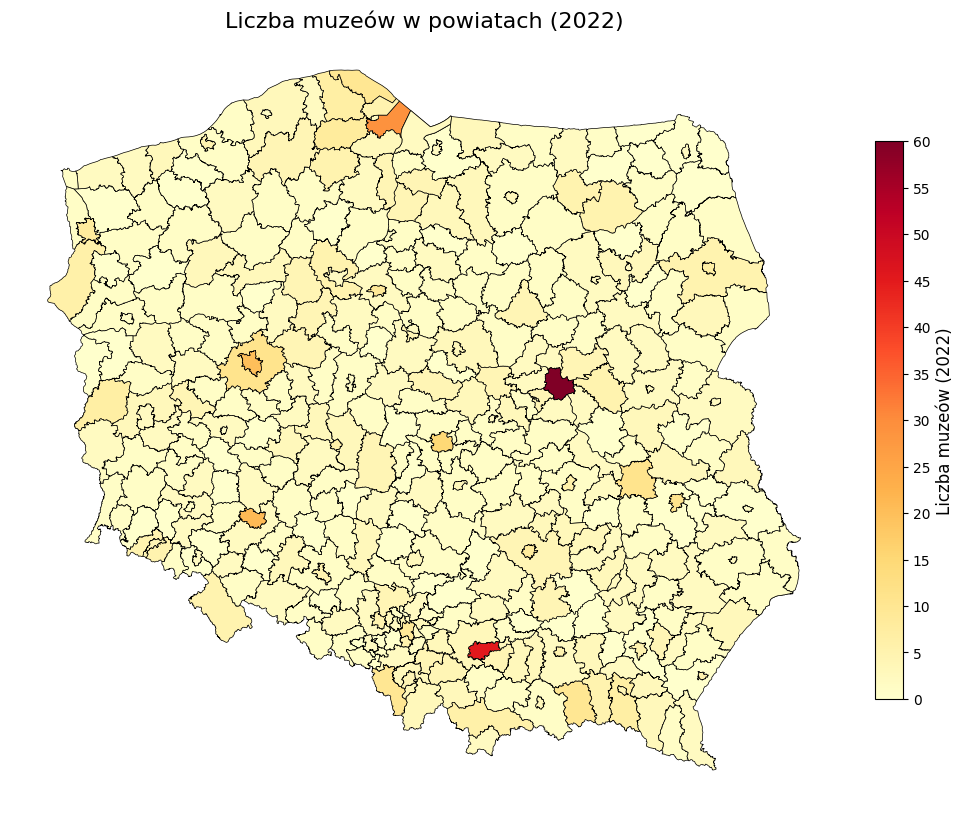

In [72]:

# Rysowanie mapy bez legendy (stworzymy własną legendę)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow_m_muzea2022.plot(
    column='muzea2022',
    cmap='YlOrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=False,  # Wyłączamy domyślną legendę
    ax=ax
)

# Tworzenie własnej legendy kolorów (colorbar)
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=0, vmax=merged_pow_m_muzea2022['muzea2022'].max())

# Dodanie paska kolorów z podziałem co 5
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_ticks(np.arange(0, merged_pow_m_muzea2022['muzea2022'].max() + 5, 5))  # Skala co 5
cbar.set_label('Średnia liczba muzeów (2022)', fontsize=12)

# Dostosowanie mapy
ax.set_axis_off()
plt.title('Średnia liczba muzeów w powiatach (2022)', fontsize=16)
plt.show()


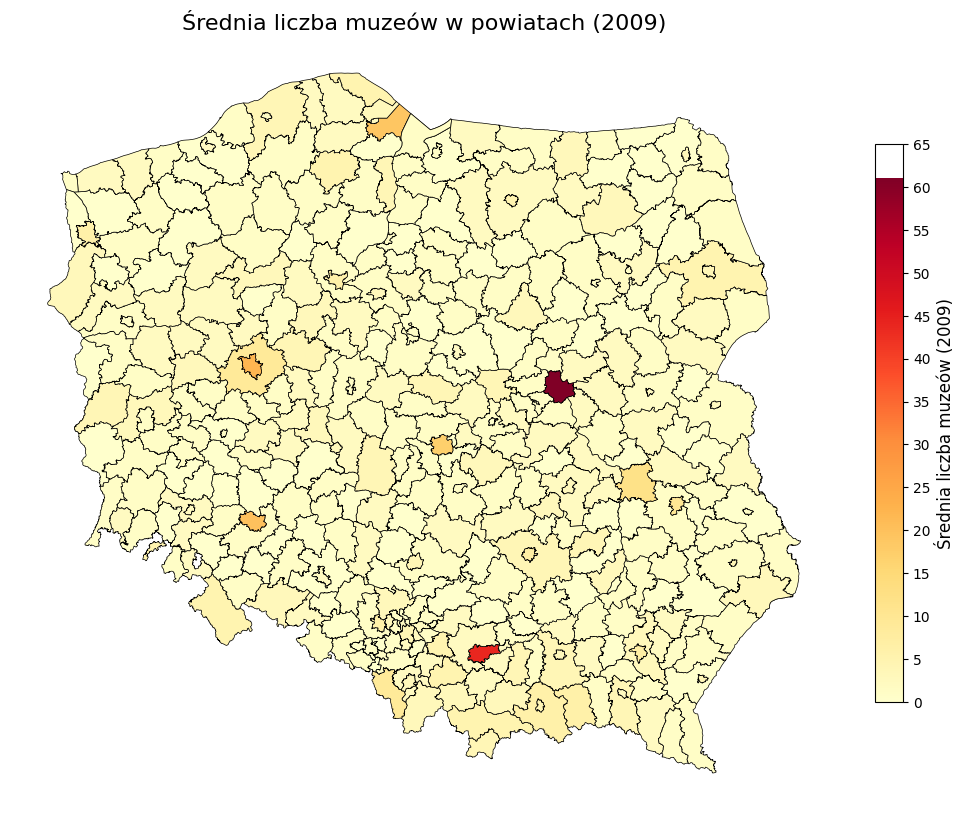

In [74]:

# Rysowanie mapy dla 2009 roku bez legendy (stworzymy własną legendę)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow_m_muzea2009.plot(
    column='muzea2009',  # Kolumna z danymi z 2009 roku
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,  # Grubość krawędzi powiatów
    edgecolor='black',  # Kolor krawędzi
    legend=False,  # Wyłączamy domyślną legendę
    ax=ax
)

# Tworzenie własnej legendy kolorów (colorbar)
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=0, vmax=merged_pow_m_muzea2009['muzea2009'].max())

# Dodanie paska kolorów z podziałem co 5
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_ticks(np.arange(0, merged_pow_m_muzea2009['muzea2009'].max() + 5, 5))  # Skala co 5
cbar.set_label('Średnia liczba muzeów (2009)', fontsize=12)

# Dostosowanie mapy
ax.set_axis_off()
plt.title('Średnia liczba muzeów w powiatach (2009)', fontsize=16)
plt.show()
